In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import load_boston

In [121]:
boston=load_boston()

In [77]:
df=pd.read_csv("HousingData.csv")

In [78]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [79]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [81]:
df.shape

(506, 14)

In [82]:
from scipy import stats

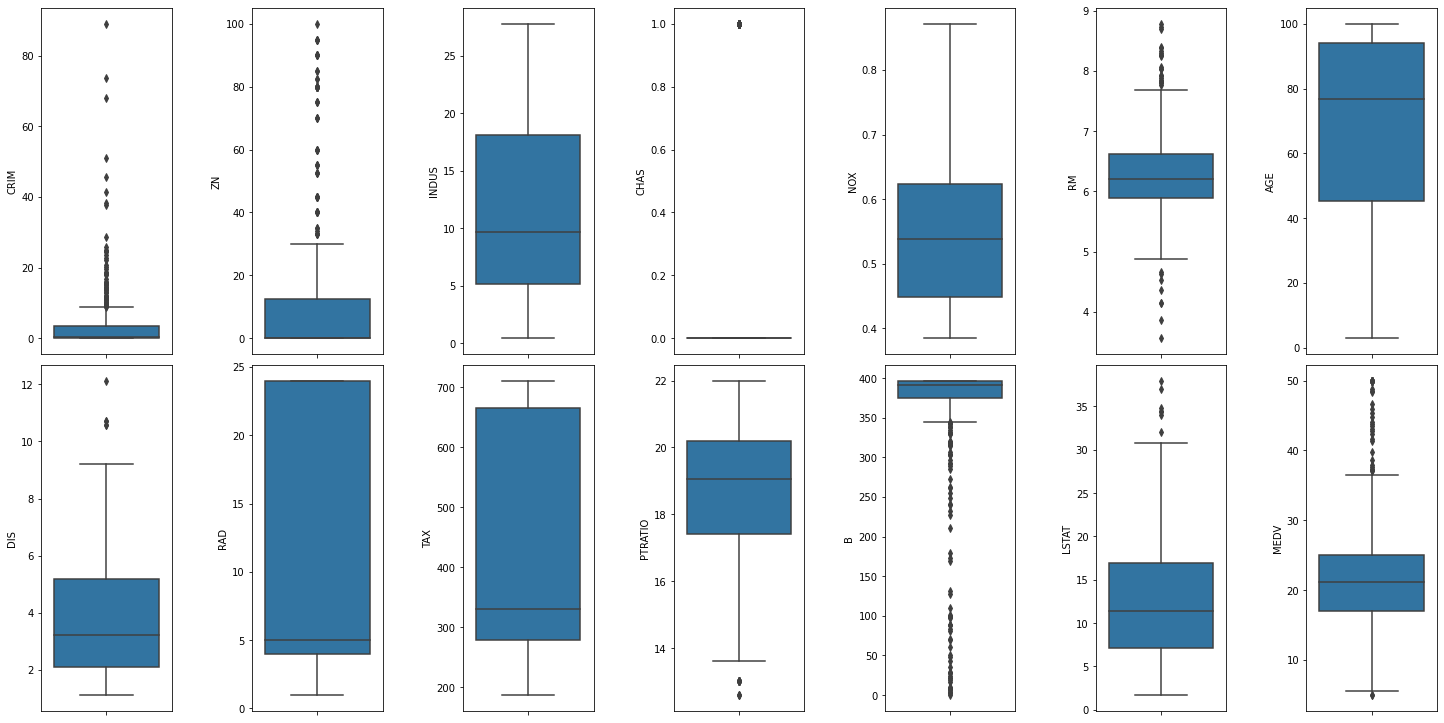

In [83]:
fig,axe=plt.subplots(nrows=2,ncols=7,figsize=(20,10))
index=0
axe=axe.flatten()
for a,b in df.items():
    sns.boxplot(y=a,data=df,ax=axe[index])
    index+=1
plt.tight_layout(pad=0.5,h_pad=0.5,w_pad=4.0)


# Features like CRIM, ZN, B have outliers. 

In [84]:
for a,b in df.items():
    q1=b.quantile(0.25)
    q3=b.quantile(0.75)
    ir=q3-q1
    b_col=b[(b<=q1-1.5*ir)|(q3+1.5*ir<=b)]
    perc=np.shape(b_col)[0]*100/np.shape(df)[0]
    print("%s outliers = %.2f%%" % (a, perc))

CRIM outliers = 12.85%
ZN outliers = 12.45%
INDUS outliers = 0.00%
CHAS outliers = 96.05%
NOX outliers = 0.00%
RM outliers = 5.93%
AGE outliers = 0.00%
DIS outliers = 0.99%
RAD outliers = 0.00%
TAX outliers = 0.00%
PTRATIO outliers = 2.96%
B outliers = 15.22%
LSTAT outliers = 1.38%
MEDV outliers = 7.91%


In [90]:
df.shape

(506, 14)

In [93]:
df=df[~(df['MEDV'] >= 50.0)]

# Remove MEDV Outliers

In [94]:
df.shape

(490, 14)

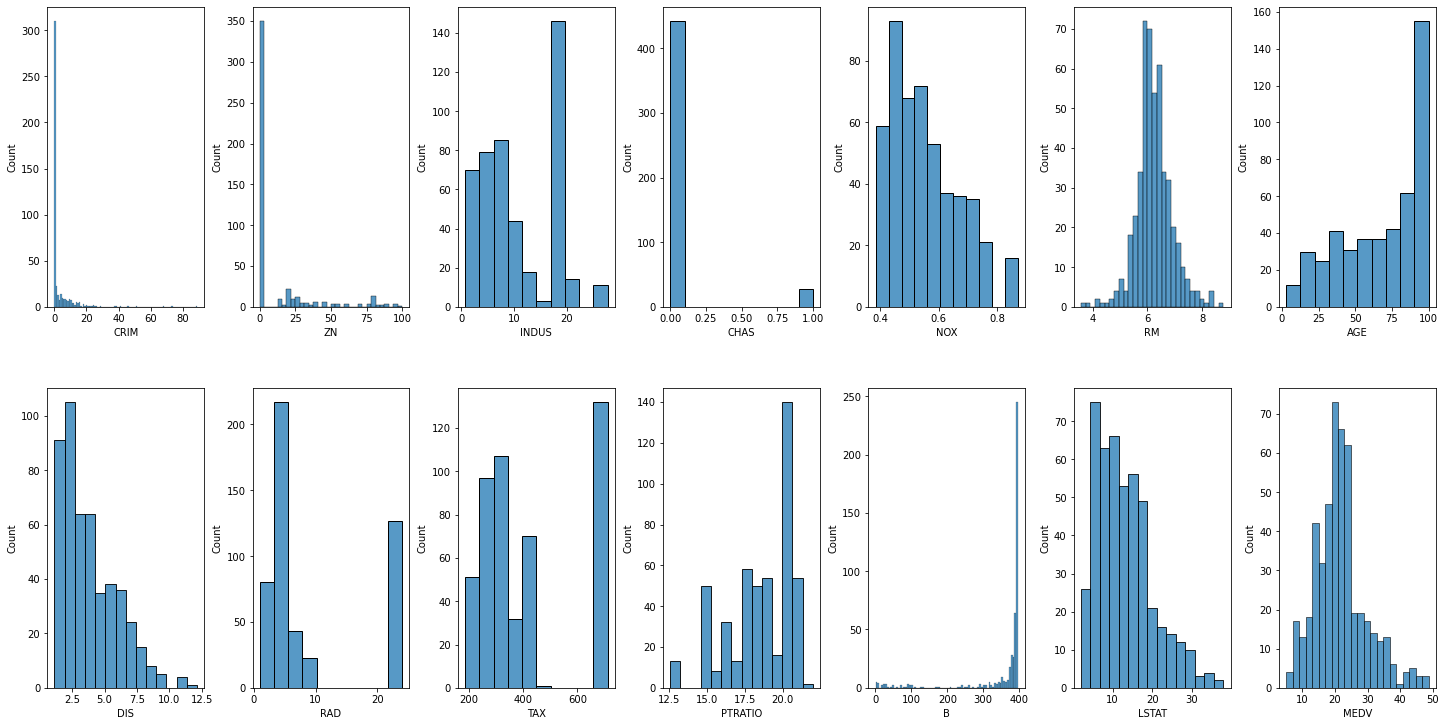

In [95]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for a,b in df.items():
    sns.histplot(b, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

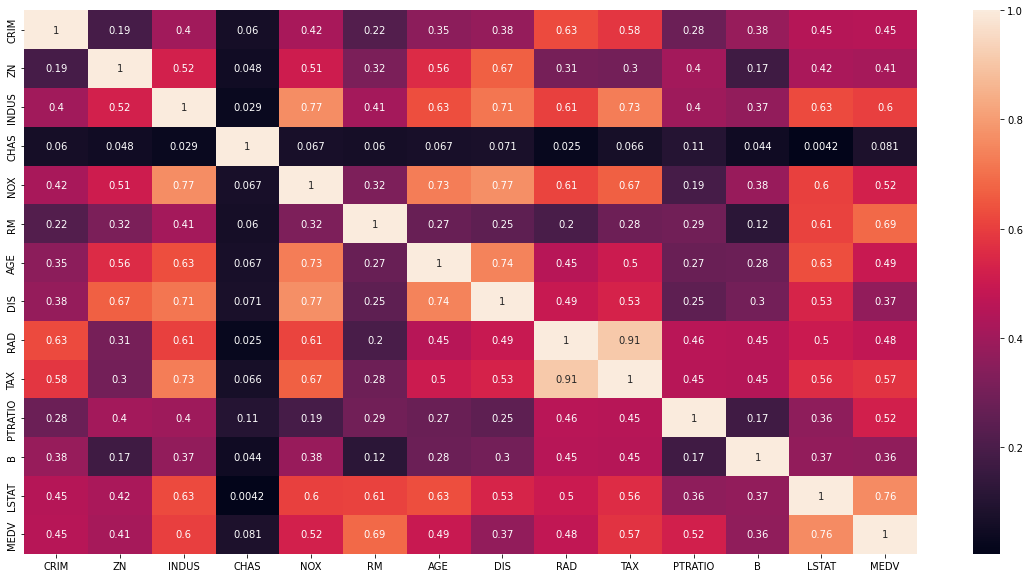

In [97]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)


# From Correalated matrix the RAD and TAX are highly correlated.
# The correlation score of  CHAS,NOX,RM,TAX,PTRATIO,LSTAT is above 0.5 with MEDV

<AxesSubplot:>

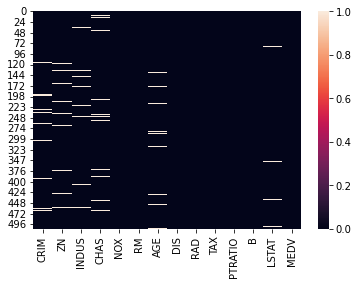

In [106]:
sns.heatmap(df.isnull())

# There is null/NaN value is present in dataset

<AxesSubplot:>

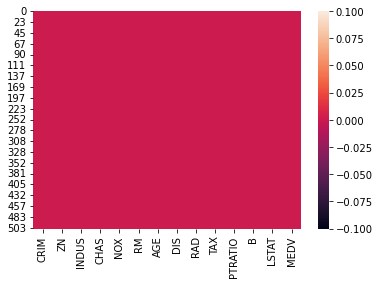

In [110]:
df.dropna(inplace=True)
sns.heatmap(df.isnull())

# Now there is not even a single null value is there.

Train Test Split

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [112]:
X=df.drop(['MEDV'],axis=1)
y=df["MEDV"]

In [113]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [115]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((229, 13), (229,), (153, 13), (153,))

In [116]:
lm=LinearRegression()

In [117]:
lm.fit(X_train,y_train)

LinearRegression()

In [118]:
pred=lm.predict(X_test) 

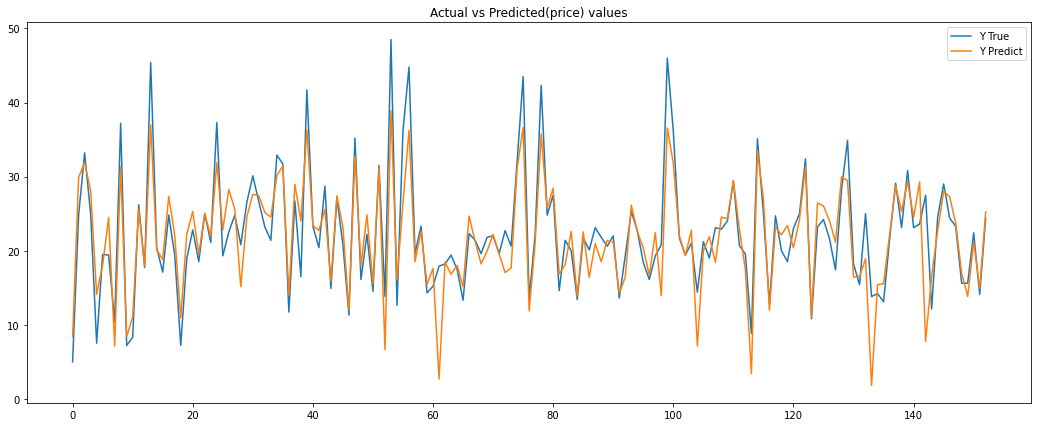

In [120]:
plt.subplots(figsize=(18,7))
x_points=list(range(len(y_test)))
plt.title("Actual vs Predicted(price) values")
plt.plot(x_points,y_test,label="Y True")
plt.plot(x_points,pred,label="Y Predict")
plt.legend()